In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [217]:
df = pd.read_csv('diamonds_train.csv')
data = df.copy()

In [218]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [219]:
r = df.copy()
r['price'] = np.log(r['price'])
r.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,5.786897,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,5.786897,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,5.789960,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,5.811141,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,5.814131,4.34,4.35,2.75


In [220]:
r['price'] = np.exp(r['price'])
r.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [221]:
data.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.798228,61.749144,57.458345,3936.532489,5.731582,5.735036,3.538968
std,0.474353,1.434620,2.239743,3997.909823,1.123013,1.146151,0.707187
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5330.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


## Add additional columns


In [223]:
data['volume'] = data['x'] * data['y'] * data['z']

## Analysis


### Checko zore or null values


In [224]:
data.isin([0]).sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          19
volume     19
dtype: int64

X,Y,Z have zero values, respectively, and the price should be zero, but this is not the case, rows with such and values have a positive price, so they need to be removed, as they are not relevant and will have the wrong effect on the results


In [225]:
data.drop(data[data["x"] == 0].index, inplace=True)
data.drop(data[data["y"] == 0].index, inplace=True)
data.drop(data[data["z"] == 0].index, inplace=True)
data.describe()

,carat,depth,table,price,x,y,z,volume
count,48921.000000,48921.000000,48921.000000,48921.000000,48921.000000,48921.000000,48921.000000,48921.000000
mean,0.797968,61.749237,57.457991,3934.511171,5.732120,5.735453,3.540342,129.953993
std,0.474113,1.434300,2.239264,3995.505405,1.120436,1.143942,0.703876,78.459483
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,31.707984
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000,65.204469
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000,114.845244
75%,1.040000,62.500000,59.000000,5328.000000,6.540000,6.540000,4.040000,170.890200
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060


### Categorical features


#### Color


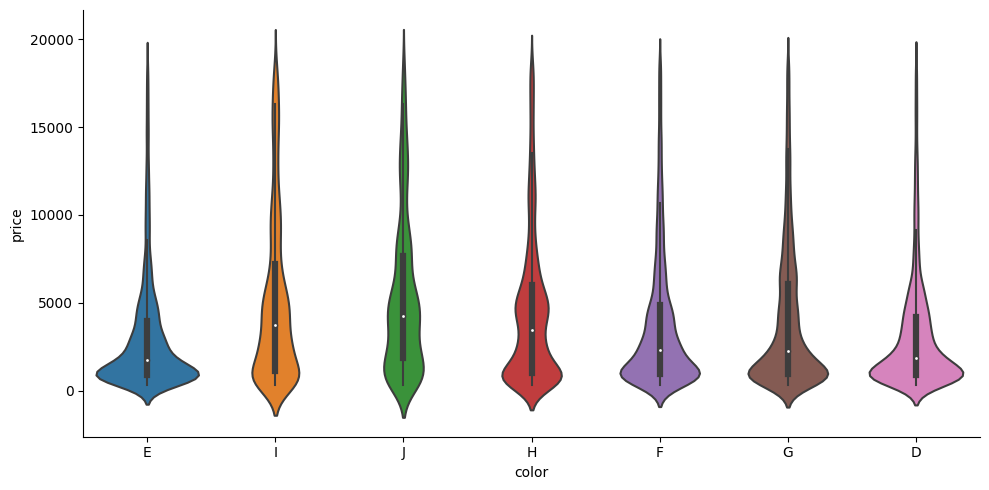

In [226]:
sns.catplot(x='color', y="price", data=data, kind='violin', aspect=2)
plt.show()

#### Encode color


In [227]:
def encode_color(data):
    color_map = {
        'D': 7,
        'E': 6,
        'F': 5,
        'G': 4,
        'H': 3,
        'I': 2,
        'J': 1,
    }
    data['e_color'] = data['color'].map(color_map)


data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [228]:
encode_color(data)

#### Cut


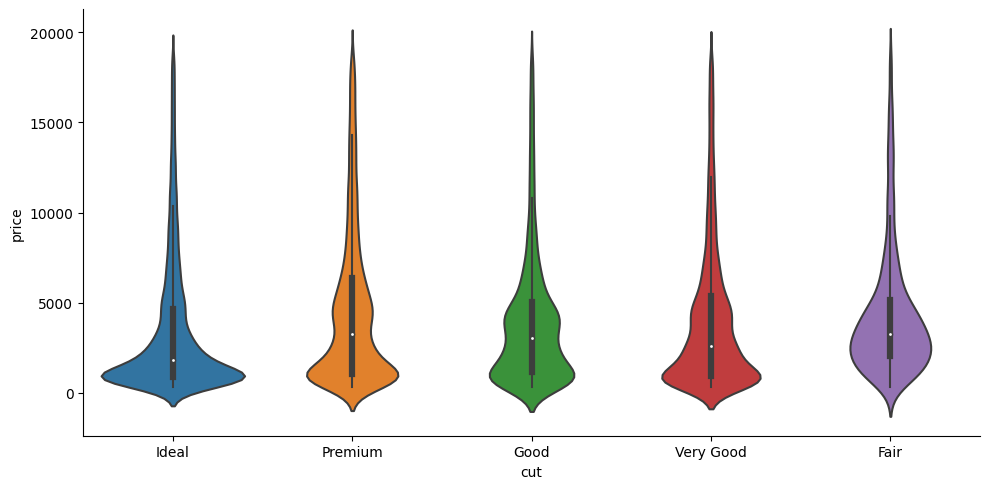

In [229]:
sns.catplot(x='cut', y="price", data=data, kind="violin", aspect=2)
plt.show()

#### Encode cut


In [230]:
data[data['carat'] == 1]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,e_color
258,1.0,Premium,I,SI2,58.2,60.0,2795,6.61,6.55,3.83,165.821765,2
293,1.0,Premium,J,SI2,62.3,58.0,2801,6.45,6.34,3.98,162.754140,1
333,1.0,Fair,G,I1,66.4,59.0,2808,6.16,6.09,4.07,152.683608,4
348,1.0,Fair,J,VS2,65.7,59.0,2811,6.14,6.07,4.01,149.451898,1
420,1.0,Premium,H,I1,61.3,60.0,2818,6.43,6.39,3.93,161.474661,3
...,...,...,...,...,...,...,...,...,...,...,...,...
48408,1.0,Ideal,J,SI2,61.2,56.0,2657,6.49,6.38,3.94,163.140428,1
48595,1.0,Premium,H,I1,61.3,60.0,2695,6.39,6.43,3.93,161.474661,3
48712,1.0,Good,F,I1,64.2,59.0,2717,6.26,6.30,4.03,158.935140,5
48761,1.0,Fair,G,I1,61.7,57.0,2723,6.39,6.28,3.91,156.905172,4


In [231]:
def encode_cut(data):
    cut_map = {
        'Ideal': 5,
        'Premium': 4,
        'Very Good': 3,
        'Good': 2,
        'Fair': 1,
    }
    data['e_cut'] = data['cut'].map(cut_map)


data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [232]:
encode_cut(data)

#### Clarity


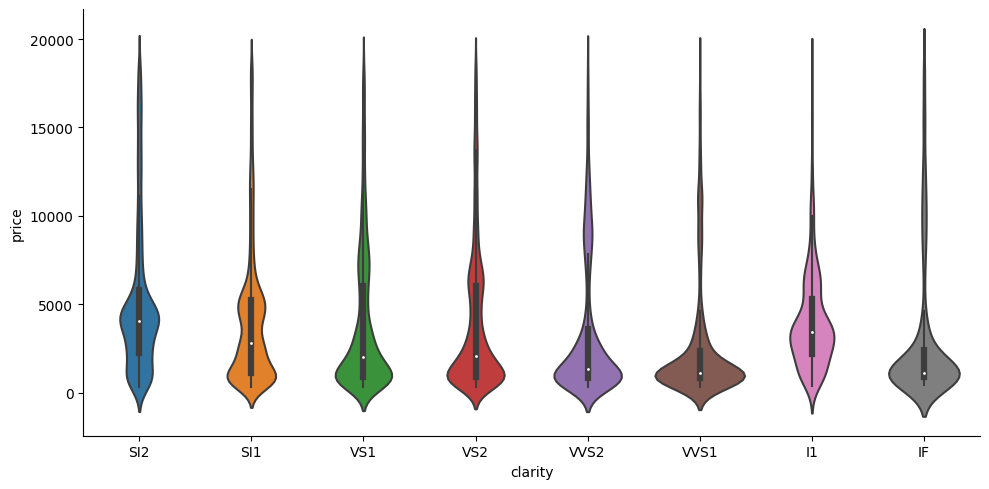

In [233]:
sns.catplot(x='clarity', y="price", data=data, kind="violin", aspect=2)
plt.show()

#### Encode clarity


In [234]:
def encode_clarity(data):
    clarity_map = {
        'IF': 8,
        'VVS1': 7,
        'VVS2': 6,
        'VS1': 5,
        'VS2': 4,
        'SI1': 3,
        'SI2': 2,
        'I1': 1,
    }
    data['e_clarity'] = data['clarity'].map(clarity_map)


data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [235]:
encode_clarity(data)

### Number features


In [236]:
data['carat'].value_counts().sort_index().tail()

3.65    1
4.00    1
4.01    2
4.50    1
5.01    1
Name: carat, dtype: int64

In [237]:
data[data['carat'] < 1.5].describe()

,carat,depth,table,price,x,y,z,volume,e_color,e_cut,e_clarity
count,43244.000000,43244.000000,43244.000000,43244.000000,43244.000000,43244.000000,43244.000000,43244.000000,43244.000000,43244.000000,43244.000000
mean,0.670625,61.743659,57.365979,2840.290144,5.470931,5.475465,3.379436,109.371770,4.545185,3.929539,4.159051
std,0.319901,1.400093,2.219505,2481.274346,0.898489,0.901554,0.572056,51.949237,1.655873,1.113771,1.656190
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,31.707984,1.000000,1.000000,1.000000
25%,0.370000,61.100000,56.000000,878.000000,4.630000,4.630000,2.850000,61.176258,3.000000,3.000000,3.000000
50%,0.580000,61.800000,57.000000,1952.000000,5.380000,5.380000,3.310000,95.559560,5.000000,4.000000,4.000000
75%,1.000000,62.500000,59.000000,4253.000000,6.340000,6.340000,3.920000,159.548574,6.000000,5.000000,5.000000
max,1.490000,79.000000,79.000000,18700.000000,7.730000,31.800000,31.800000,838.502400,7.000000,5.000000,8.000000


In [238]:
data[data['price'] < 7200].describe()

,carat,depth,table,price,x,y,z,volume,e_color,e_cut,e_clarity
count,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000
mean,0.645146,61.764562,57.385560,2432.737567,5.400934,5.404853,3.337535,105.141896,4.512813,3.901955,4.063501
std,0.313315,1.435426,2.243606,1849.492801,0.876888,0.879090,0.562867,50.645617,1.686316,1.129896,1.655537
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,31.707984,1.000000,1.000000,1.000000
25%,0.360000,61.100000,56.000000,854.000000,4.580000,4.580000,2.820000,58.989560,3.000000,3.000000,3.000000
50%,0.550000,61.800000,57.000000,1799.000000,5.280000,5.290000,3.250000,90.604637,5.000000,4.000000,4.000000
75%,0.910000,62.500000,59.000000,3801.750000,6.190000,6.190000,3.850000,147.259195,6.000000,5.000000,5.000000
max,3.000000,79.000000,79.000000,7199.000000,9.230000,31.800000,31.800000,838.502400,7.000000,5.000000,8.000000


In [239]:
data[data['volume'] < 200].describe()

,carat,depth,table,price,x,y,z,volume,e_color,e_cut,e_clarity
count,41291.000000,41291.000000,41291.000000,41291.000000,41291.000000,41291.000000,41291.000000,41291.000000,41291.000000,41291.000000,41291.000000
mean,0.641117,61.757245,57.358243,2611.059529,5.397958,5.402372,3.334745,104.484650,4.594754,3.922768,4.177157
std,0.296134,1.402003,2.229170,2236.233068,0.852468,0.847051,0.529150,47.691074,1.641450,1.120373,1.659054
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,31.707984,1.000000,1.000000,1.000000
25%,0.360000,61.100000,56.000000,857.000000,4.590000,4.590000,2.820000,59.416167,3.000000,3.000000,3.000000
50%,0.560000,61.800000,57.000000,1819.000000,5.300000,5.310000,3.260000,91.579425,5.000000,4.000000,4.000000
75%,0.910000,62.500000,59.000000,3906.000000,6.220000,6.220000,3.860000,148.828098,6.000000,5.000000,5.000000
max,2.060000,79.000000,79.000000,18542.000000,7.850000,7.500000,5.060000,199.999475,7.000000,5.000000,8.000000


In [240]:
data.drop(data[data['carat'] > 1.5].index, inplace=True)
data.drop(data[data['price'] > 7000].index, inplace=True)
data.drop(data[data['volume'] > 200].index, inplace=True)

### Price


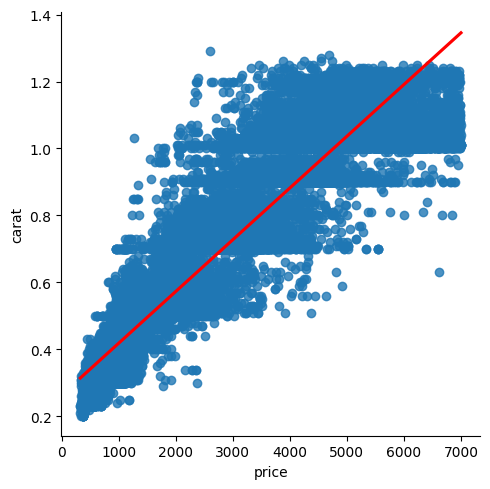

In [241]:
sns.lmplot(x="price", y="carat", data=data, line_kws={"color": "red"})
plt.show()

In [242]:
def encode_price(data, col='price'):
    data[col] = np.log(data['price'])


encode_price(data)

#### Carat


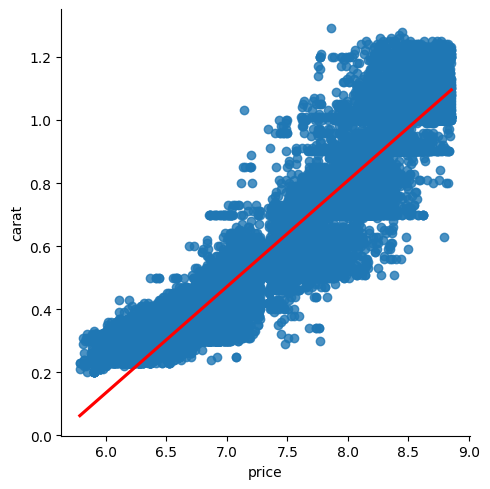

In [243]:
sns.lmplot(x="price", y="carat", data=data, line_kws={"color": "red"})
plt.show()

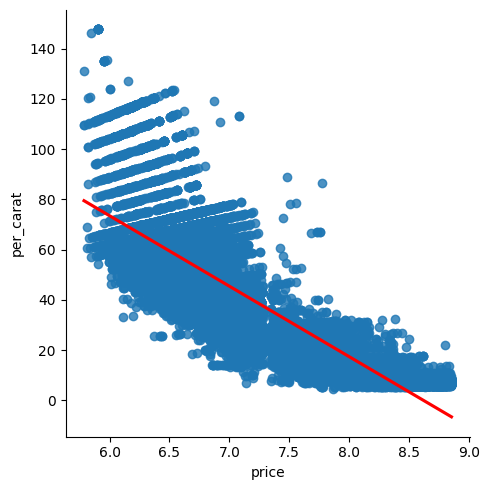

In [244]:
def add_per_carat(data):
    data['per_carat'] = data['price'] / data['carat'] ** 2


add_per_carat(data)

sns.lmplot(x="price", y="per_carat", data=data, line_kws={"color": "red"})
plt.show()

In [245]:
data[data['per_carat'] < 5000].describe()

,carat,depth,table,price,x,y,z,volume,e_color,e_cut,e_clarity,per_carat
count,39230.000000,39230.000000,39230.000000,39230.000000,39230.000000,39230.000000,39230.000000,39230.000000,39230.000000,39230.000000,39230.000000,39230.000000
mean,0.617358,61.761710,57.365985,7.434451,5.334645,5.338942,3.295934,100.619057,4.572648,3.910859,4.110349,33.254109
std,0.283902,1.413552,2.244716,0.794100,0.826378,0.820286,0.513540,45.663979,1.659701,1.125748,1.650590,25.364368
min,0.200000,43.000000,43.000000,5.786897,3.730000,3.680000,1.070000,31.707984,1.000000,1.000000,1.000000,4.724312
25%,0.350000,61.100000,56.000000,6.730123,4.550000,4.550000,2.800000,57.918315,3.000000,3.000000,3.000000,10.360527
50%,0.540000,61.800000,57.000000,7.441614,5.230000,5.240000,3.230000,88.149918,5.000000,4.000000,4.000000,25.741851
75%,0.900000,62.500000,59.000000,8.156654,6.090000,6.090000,3.770000,142.319100,6.000000,5.000000,5.000000,53.644823
max,1.290000,79.000000,79.000000,8.853523,7.150000,7.030000,5.060000,199.999475,7.000000,5.000000,8.000000,147.634046


In [246]:
# data.drop(data[data['per_carat'] > 5000].index, inplace=True)

#### Depth


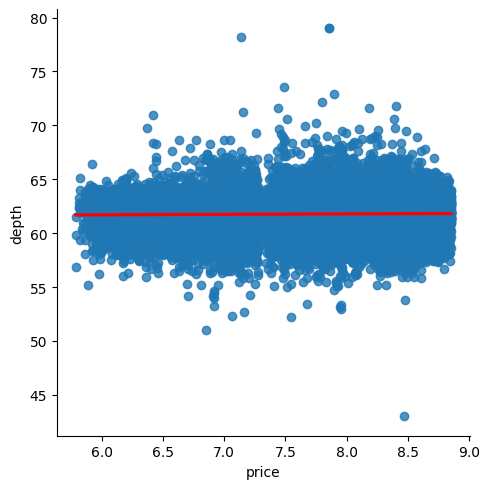

In [247]:
sns.lmplot(x="price", y="depth", data=data, line_kws={"color": "red"})
plt.show()

### Clean depth outlier


In [248]:
data.drop(data[data["depth"] > 75].index, inplace=True)
data.drop(data[data["depth"] < 50].index, inplace=True)

#### Table


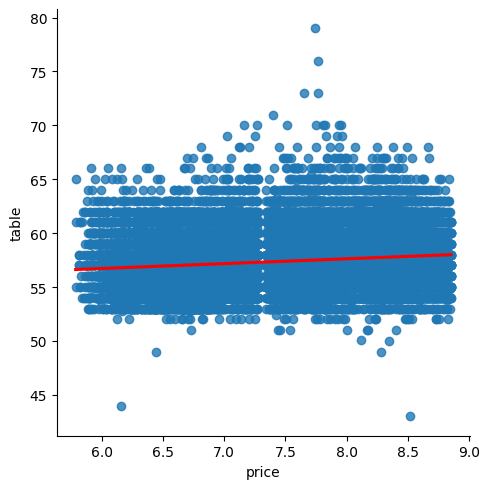

In [249]:
sns.lmplot(x="price", y="table", data=data, line_kws={"color": "red"})
plt.show()

### Clean table outlier


In [250]:
data.drop(data[data["table"] > 75].index, inplace=True)
data.drop(data[data["table"] < 55].index, inplace=True)

#### X,Y,Z


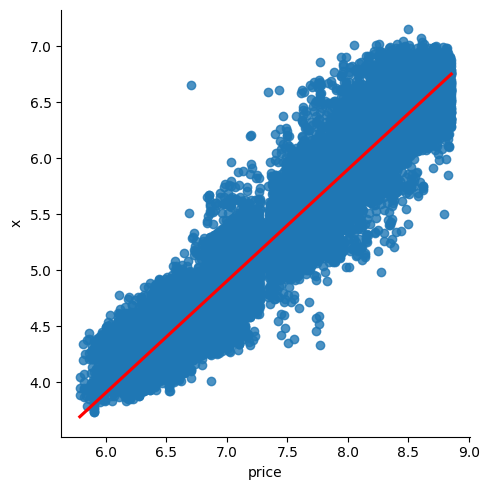

In [251]:
sns.lmplot(x="price", y="x", data=data, line_kws={"color": "red"})
plt.show()

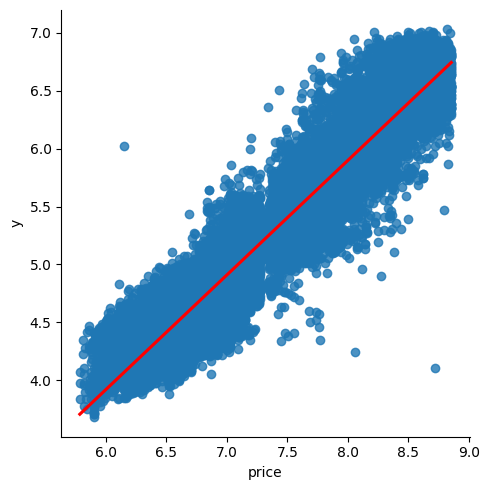

In [252]:
sns.lmplot(x="price", y="y", data=data, line_kws={"color": "red"})
plt.show()

### Clean y outlier


In [253]:
data.drop(data[data["y"] > 15].index, inplace=True)

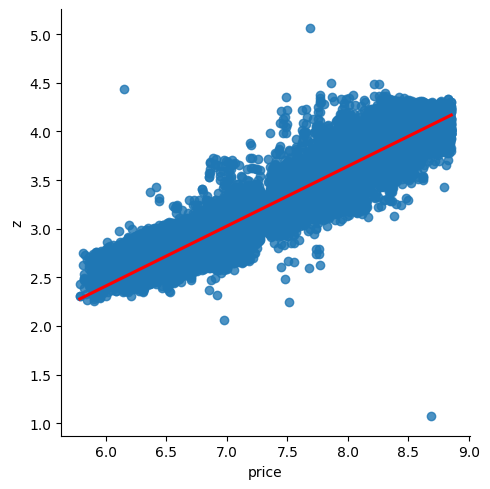

In [254]:
sns.lmplot(x="price", y="z", data=data, line_kws={"color": "red"})
plt.show()

### Clean z outlier


In [255]:
data.drop(data[data["z"] > 10].index, inplace=True)
data.drop(data[data["z"] < 2].index, inplace=True)

## Heatmap correlation


/var/folders/j5/qdt_sr0x7gs48d425mjh29hr0000gn/T/ipykernel_98135/2295312059.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)


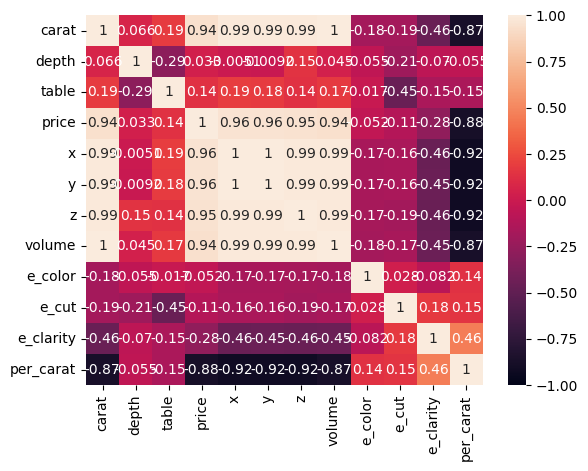

In [256]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [257]:
data.describe()

,carat,depth,table,price,x,y,z,volume,e_color,e_cut,e_clarity,per_carat
count,36407.000000,36407.000000,36407.000000,36407.000000,36407.000000,36407.000000,36407.000000,36407.000000,36407.000000,36407.000000,36407.00000,36407.000000
mean,0.624233,61.717162,57.639825,7.454035,5.354763,5.358200,3.305821,101.649196,4.589063,3.873815,4.07570,32.734339
std,0.285226,1.420765,2.076142,0.793533,0.828722,0.822861,0.515092,45.868290,1.654834,1.117135,1.63342,25.335330
min,0.200000,51.000000,55.000000,5.786897,3.730000,3.680000,2.060000,31.707984,1.000000,1.000000,1.00000,4.724312
25%,0.360000,61.000000,56.000000,6.746412,4.570000,4.570000,2.810000,58.548147,3.000000,3.000000,3.00000,10.242034
50%,0.540000,61.800000,57.000000,7.469654,5.260000,5.270000,3.240000,89.428416,5.000000,4.000000,4.00000,25.093726
75%,0.900000,62.500000,59.000000,8.182280,6.120000,6.120000,3.800000,143.824194,6.000000,5.000000,5.00000,52.233428
max,1.290000,73.600000,73.000000,8.853523,7.150000,7.030000,5.060000,199.999475,7.000000,5.000000,8.00000,147.634046


In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36407 entries, 0 to 48939
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      36407 non-null  float64
 1   cut        36407 non-null  object 
 2   color      36407 non-null  object 
 3   clarity    36407 non-null  object 
 4   depth      36407 non-null  float64
 5   table      36407 non-null  float64
 6   price      36407 non-null  float64
 7   x          36407 non-null  float64
 8   y          36407 non-null  float64
 9   z          36407 non-null  float64
 10  volume     36407 non-null  float64
 11  e_color    36407 non-null  int64  
 12  e_cut      36407 non-null  int64  
 13  e_clarity  36407 non-null  int64  
 14  per_carat  36407 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 4.4+ MB


## Train data


In [259]:
X = data[['per_carat', 'carat', 'e_cut', 'e_color', 'e_clarity', 'depth']]
y = data['price']

In [260]:
X.head()

,per_carat,carat,e_cut,e_color,e_clarity,depth
0,109.393145,0.23,5,6,2,61.5
1,131.222163,0.21,4,6,3,59.8
2,109.451043,0.23,2,6,5,56.9
3,69.097990,0.29,4,2,4,62.4
4,60.500838,0.31,2,1,2,63.3


In [261]:
X.describe()

,per_carat,carat,e_cut,e_color,e_clarity,depth
count,36407.000000,36407.000000,36407.000000,36407.000000,36407.00000,36407.000000
mean,32.734339,0.624233,3.873815,4.589063,4.07570,61.717162
std,25.335330,0.285226,1.117135,1.654834,1.63342,1.420765
min,4.724312,0.200000,1.000000,1.000000,1.00000,51.000000
25%,10.242034,0.360000,3.000000,3.000000,3.00000,61.000000
50%,25.093726,0.540000,4.000000,5.000000,4.00000,61.800000
75%,52.233428,0.900000,5.000000,6.000000,5.00000,62.500000
max,147.634046,1.290000,5.000000,7.000000,8.00000,73.600000


In [262]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=42)

X_train.shape, X_test.shape

((25484, 6), (10923, 6))

## Model selector


In [263]:
def measuring_models(models, X_train, y_train, scoring="neg_mean_absolute_error"):
    for name, model in models.items():
        cv_score = cross_val_score(
            model, X_train, y_train, scoring=scoring)
        print(name, cv_score.mean())


models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
}

# measuring_models(models, X_train, y_train)

In [264]:
def RFR_best_params(X_train, y_train):
    rfr = RandomForestRegressor()
    params = {
        'n_estimators': [100, 200, 500],
        'max_depth': [5, 10, 15],
        'min_samples_leaf': [1, 2, 5, 10],
        'min_samples_split': [2, 5, 10, 15],
    }
    gs = GridSearchCV(rfr, params, cv=5, n_jobs=-1,
                      verbose=1).fit(X_train, y_train)
    return gs.best_params_

In [265]:
def get_model(name, X_train, y_train, find_best_params=False):
    if (name == 'R'):
        params = {
            'n_estimators': 140,
            'max_depth': 14,
            'min_samples_leaf': 5,
            'min_samples_split': 10,
        }
        if find_best_params:
            params = RFR_best_params(X_train, y_train)

        return RandomForestRegressor(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            min_samples_leaf=params['min_samples_leaf'],
            min_samples_split=params['min_samples_split'],
        ).fit(X_train, y_train)

    return LinearRegression().fit(X_train, y_train)

## Predictions


In [266]:
model = get_model('R', X_train, y_train)

pred = model.predict(X_test)

print("r2_score:", r2_score(y_test, pred))
print("mean_absolute_error:", mean_absolute_error(y_test, pred))
print("mean_squared_error:", np.sqrt(mean_squared_error(y_test, pred)))

KeyboardInterrupt: 

In [ ]:
neg_pred = [x for p, x in zip(pred, X_test.to_numpy()) if p < 0]
len(neg_pred)

0

In [ ]:
error = pred - y_test
s_error = sorted(zip(error, X_test.to_numpy()), key=lambda x: x[1][3])
s_error[:4]

[(0.005980383853779081,
  array([14.87465953,  0.71      ,  3.        ,  1.        ,  2.        ,
         60.7       ])),
 (-0.04850422289229339,
  array([14.02936897,  0.74      ,  3.        ,  1.        ,  5.        ,
         62.7       ])),
 (-0.003330262445967236,
  array([15.48534127,  0.7       ,  5.        ,  1.        ,  4.        ,
         61.9       ])),
 (0.01574678636191429,
  array([ 9.78308739,  0.91      ,  5.        ,  1.        ,  4.        ,
         61.9       ]))]

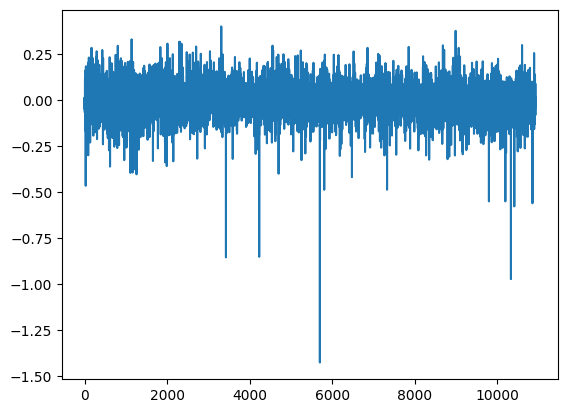

In [ ]:
error, _ = zip(*s_error)
plt.plot(error)
plt.show()

In [ ]:
fail_pred = list(filter(lambda x: x[0] < -0.25, s_error)) + \
    list(filter(lambda x: x[0] > 0.25, s_error))
len(fail_pred)

98

In [ ]:
fail_pred[:5]

[(-0.4647091090784361,
  array([55.9625208,  0.35     ,  4.       ,  1.       ,  5.       ,
         62.4      ])),
 (-0.2989768786682516,
  array([26.77755064,  0.52      ,  5.        ,  1.        ,  3.        ,
         62.3       ])),
 (-0.2714674444624894,
  array([53.08144911,  0.36      ,  4.        ,  2.        ,  8.        ,
         59.9       ])),
 (-0.36051092731421,
  array([40.64257379,  0.42      ,  5.        ,  2.        ,  6.        ,
         61.2       ])),
 (-0.2521492396108016,
  array([15.27987462,  0.73      ,  5.        ,  2.        ,  4.        ,
         60.8       ]))]

## All data prediction


In [ ]:
all_data = df.copy()

encode_price(all_data)
encode_color(all_data)
encode_cut(all_data)
encode_clarity(all_data)
add_per_carat(all_data)

all_data.describe()

,carat,depth,table,price,x,y,z,e_color,e_cut,e_clarity,per_carat
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.798228,61.749144,57.458345,7.786840,5.731582,5.735036,3.538968,4.405701,3.900736,4.051941,27.569450
std,0.474353,1.434620,2.239743,1.015443,1.123013,1.146151,0.707187,1.703195,1.117138,1.647221,25.438117
min,0.200000,43.000000,43.000000,5.786897,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.390402
25%,0.400000,61.000000,56.000000,6.854355,4.710000,4.720000,2.910000,3.000000,3.000000,3.000000,7.854435
50%,0.700000,61.800000,57.000000,7.783641,5.700000,5.710000,3.530000,4.000000,4.000000,4.000000,15.778107
75%,1.040000,62.500000,59.000000,8.581107,6.540000,6.540000,4.040000,6.000000,5.000000,5.000000,43.255198
max,5.010000,79.000000,95.000000,9.842835,10.740000,58.900000,31.800000,7.000000,5.000000,8.000000,147.634046


In [ ]:
Pdata = all_data[['per_carat', 'carat',
                  'e_cut', 'e_color', 'e_clarity', 'depth']]
Ydata = all_data['price']

pred = model.predict(Pdata)

print("r2_score:", r2_score(Ydata, pred))
print("mean_absolute_error:", mean_absolute_error(Ydata, pred))
print("mean_squared_error:", np.sqrt(mean_squared_error(Ydata, pred)))

r2_score: 0.9033574985889086
mean_absolute_error: 0.14990898331377323
mean_squared_error: 0.3156713073342773
